# Course 1: Week 2 - Regression Overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model as lm
import numpy as np

%matplotlib inline

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

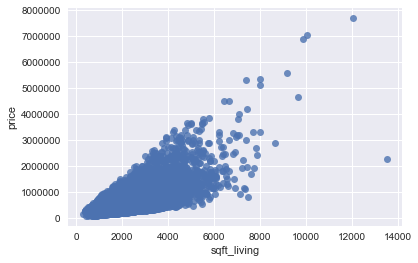

In [4]:
sns.regplot(data= sales, x="sqft_living", y="price", fit_reg= False)

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let pd Create pick a random seed for you).  

In [5]:
train_data,test_data = model_selection.train_test_split(sales, test_size = 0.2, random_state = 1234) # random_state is seed

##  Build the regression model using only sqft_living as a feature

In [6]:
# The sklearn works with arrays but our data set is a dataframe. Converting X & Y to arrays
X = train_data.sqft_living.values.reshape(len(train_data.sqft_living), 1) 
Y = train_data.price.values.reshape(len(train_data.price), 1)

In [7]:
x = test_data.sqft_living.values.reshape(len(test_data.sqft_living), 1) 
y = test_data.price.values.reshape(len(test_data.price), 1)

In [8]:
model = lm.LinearRegression()

In [9]:
sqft_model = model.fit(X,Y)

# Evaluate the simple model

$RMSE = \sqrt{RSS/N}$

In [10]:
np.sqrt(np.mean((sqft_model.predict(x) - y) **2))

258855.98945445608

RMSE of about \$258,855!

# Let's show what our predictions look like

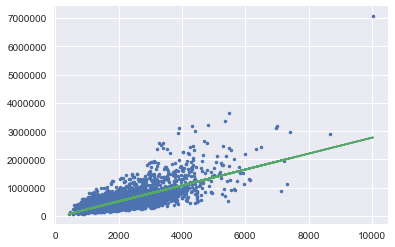

In [11]:
plt.plot(test_data['sqft_living'], test_data['price'],'.',
        test_data['sqft_living'], model.predict(x),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [12]:
model.coef_

array([[ 281.43636509]])

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [13]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

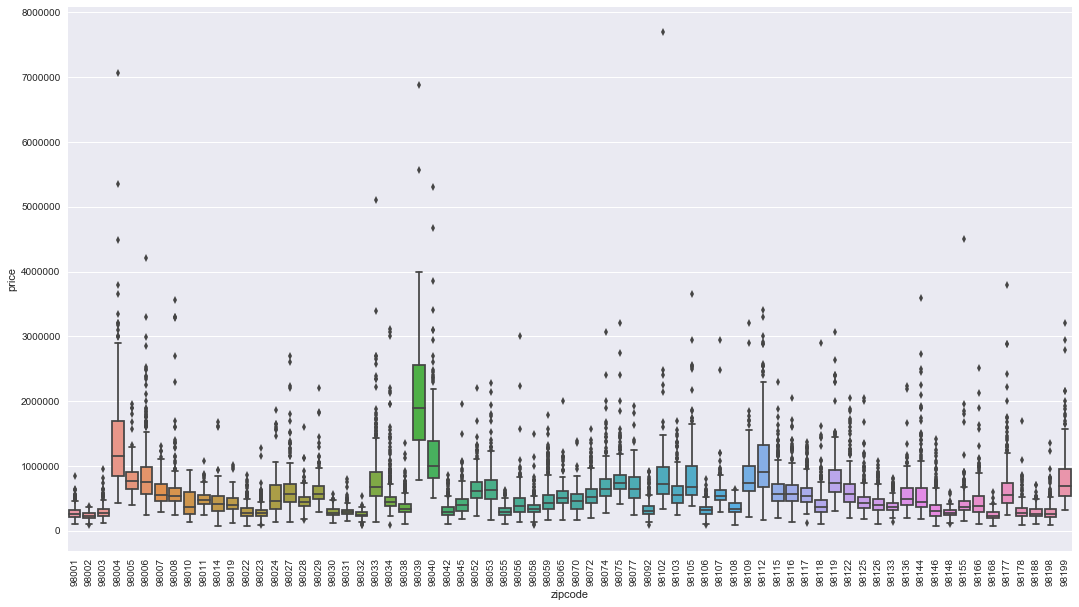

In [14]:
plt.figure(figsize=(18,10))
plt.xticks(rotation = 90)
sns.boxplot(data=sales, x="zipcode", y= "price")

**98039** is the most expensive zip code.

# Build a regression model with more features

In [15]:
X2 = np.array(train_data[my_features])
Y2 = train_data.price.values.reshape(len(train_data.price), 1)

In [16]:
x2 = np.array(test_data[my_features])
y2 = test_data.price.values.reshape(len(test_data.price), 1)

In [17]:
model2 = lm.LinearRegression()
my_features_model = model2.fit(X2,Y2)

##  Comparing the results of the simple model with adding more features

In [18]:
print(np.sqrt(np.mean((sqft_model.predict(x) - y) **2)))
np.sqrt(np.mean((my_features_model.predict(x2) - y2) **2))

258855.989454


253214.56134335176

The RMSE goes down slightly from with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [19]:
house1 = sales[sales['id']==5309101200]

In [20]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [21]:
house1['price']

1054    620000
Name: price, dtype: int64

In [22]:
sqft_model.predict(house1.sqft_living.values.reshape(1,-1))

array([[ 631157.62862072]])

In [23]:
my_features_model.predict(np.array(house1[my_features]))

array([[ 633455.47210222]])

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##  Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [24]:
house2 = sales[sales['id']==1925069082]

In [25]:
house2.price

1361    2200000
Name: price, dtype: int64

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
sqft_model.predict(house2.sqft_living.values.reshape(1,-1))

array([[ 1261575.08641464]])

In [27]:
my_features_model.predict(np.array(house2[my_features]))

array([[ 1267731.78341427]])

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##  Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

bill_gates = pd.DataFrame(bill_gates)
bill_gates.head()

,bathrooms,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,25,8,10,4,10,47.627606,-122.242054,37500,12500,50000,5000,225000,40000,4,1,1994,2010,98039


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [29]:
my_features_model.predict(np.array(bill_gates[my_features]))

array([[ 15666254.08148802]])

The model predicts a price of over $15M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)